In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from branca.colormap import linear

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
import sqlite3
conn = sqlite3.connect(':memory:')

# Import and Visualize National Park Data

In [4]:
df = pd.read_csv("US-National-Parks_RecreationVisits_1979-2023.csv")
df.to_sql('df', conn, index=False, if_exists='replace')

2783

In [5]:
df.columns

Index(['ParkName', 'Region', 'State', 'Year', 'RecreationVisits'], dtype='object')

In [6]:
query = '''
SELECT DISTINCT ParkName, Region, State
FROM df
ORDER BY Region, State
'''    
    
df1 = pd.read_sql_query(query, conn)

In [7]:
df1.head(63)

,ParkName,Region,State
0,Denali NP & PRES,Alaska,AK
1,Gates of the Arctic NP & PRES,Alaska,AK
2,Glacier Bay NP & PRES,Alaska,AK
3,Katmai NP & PRES,Alaska,AK
4,Kenai Fjords NP,Alaska,AK
5,Kobuk Valley NP,Alaska,AK
6,Lake Clark NP & PRES,Alaska,AK
7,Wrangell-St. Elias NP & PRES,Alaska,AK
8,Grand Canyon NP,Intermountain,AZ
9,Petrified Forest NP,Intermountain,AZ


In [8]:
nat_park = "'Everglades NP'"

query = f'''
SELECT *
FROM df
WHERE ParkName = {nat_park} AND (Year BETWEEN 1995 AND 2021)
'''
    
everglades = pd.read_sql_query(query, conn)

nat_park = "'Biscayne NP'"

query = f'''
SELECT *
FROM df
WHERE ParkName = {nat_park} AND (Year BETWEEN 1995 AND 2021)
'''

biscayne = pd.read_sql_query(query, conn)

nat_park = "'Joshua Tree NP'"

query = f'''
SELECT *
FROM df
WHERE ParkName = {nat_park} AND (Year BETWEEN 1995 AND 2021)
'''

joshua_tree = pd.read_sql_query(query, conn)

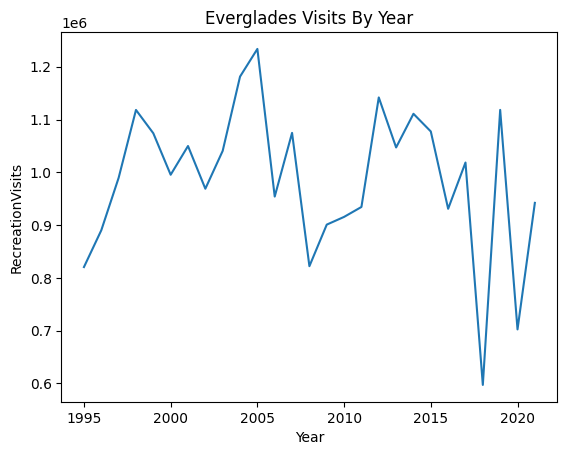

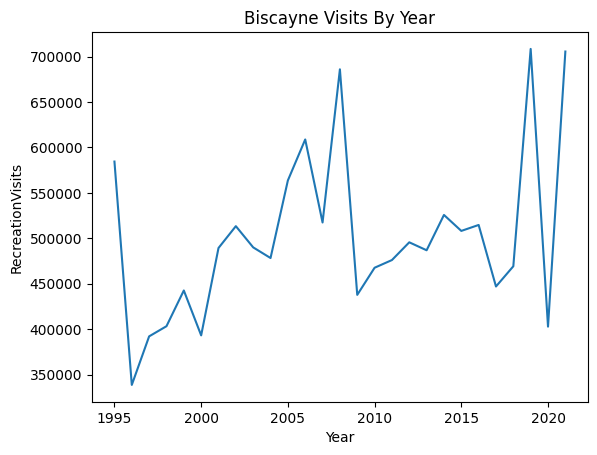

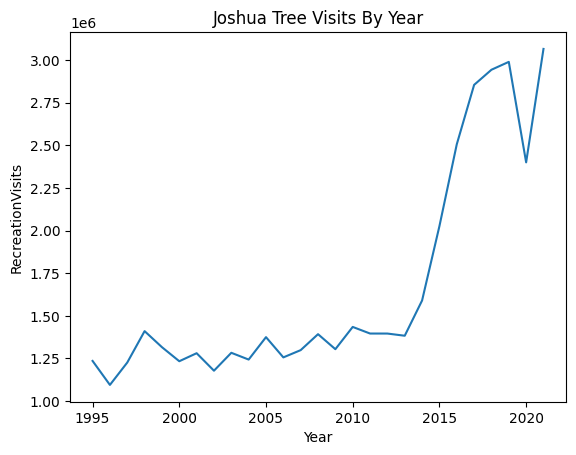

In [9]:
plt.plot(everglades['Year'], everglades['RecreationVisits'])
plt.xlabel("Year")
plt.ylabel("RecreationVisits")
plt.title("Everglades Visits By Year")
plt.show()

plt.plot(biscayne['Year'], biscayne['RecreationVisits'])
plt.xlabel("Year")
plt.ylabel("RecreationVisits")
plt.title("Biscayne Visits By Year")
plt.show()

plt.plot(joshua_tree['Year'], joshua_tree['RecreationVisits'])
plt.xlabel("Year")
plt.ylabel("RecreationVisits")
plt.title("Joshua Tree Visits By Year")
plt.show()

# Import and Visualize Regular Gasoline Data

In [10]:
gas = pd.read_csv("GAS_PRICES(1995-2021).csv")
gas.to_sql('gas', conn, index=False, if_exists='replace')

1361

In [11]:
#R1 Is Regular Gasoline Sales
gas.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [12]:
query = '''
SELECT substr(Date, 7, 4) AS year, AVG(R1) AS R1
FROM gas
GROUP BY substr(Date, 7, 4)
'''    
    
gas_yoy = pd.read_sql_query(query, conn)

In [13]:
gas_yoy.head()

,year,R1
0,1995,1.110865
1,1996,1.199075
2,1997,1.199038
3,1998,1.029654
4,1999,1.135808


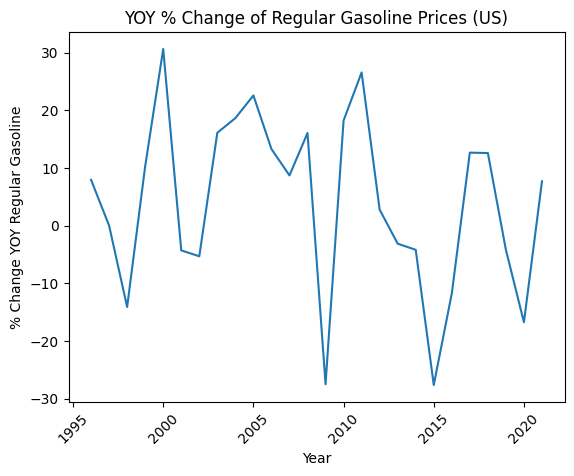

In [14]:
gas_yoy['r1_percent_change'] = gas_yoy['R1'].pct_change() * 100
gas_yoy['Year'] = gas_yoy['year']
gas_yoy['Year'] = gas_yoy['Year'].astype(int)
gas_yoy = gas_yoy.drop(columns=['year'], axis=1)

plt.plot(gas_yoy['Year'], gas_yoy['r1_percent_change'])
plt.title("YOY % Change of Regular Gasoline Prices (US)")
plt.xlabel("Year")
plt.ylabel("% Change YOY Regular Gasoline")
plt.xticks(rotation=45)
plt.show()

# Comparing Gas Prices and National Park Visits

In [15]:
merged_df = pd.merge(df, gas_yoy, on='Year')

In [16]:
merged_df.to_sql('merged_df', conn, index=False, if_exists='replace')

merged_df.head()

,ParkName,Region,State,Year,RecreationVisits,R1,r1_percent_change
0,Acadia NP,Northeast,ME,1995,2845378,1.110865,NaN
1,Acadia NP,Northeast,ME,1996,2704831,1.199075,7.940664
2,Acadia NP,Northeast,ME,1997,2760306,1.199038,-0.003087
3,Acadia NP,Northeast,ME,1998,2594497,1.029654,-14.126704
4,Acadia NP,Northeast,ME,1999,2602227,1.135808,10.309663


In [17]:
# Extract All Unique Parks

query = '''
SELECT DISTINCT ParkName
FROM merged_df
'''    
    
park_names = pd.read_sql_query(query, conn)
park_names = park_names['ParkName']
park_names = list(park_names)


In [18]:
# Function to impute outliers to remove wonky/bad data
def impute_outliers(df):
    Q1 = df['RecreationVisits'].quantile(0.25)
    Q3 = df['RecreationVisits'].quantile(0.75)
    IQR = Q3 - Q1

    # Step 2: Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 3: Identify outliers and impute with the median
    median_value = df['RecreationVisits'].median()
    df['RecreationVisits'] = df['RecreationVisits'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

    return df['RecreationVisits']

## Pearson Correlation Hypothesis Test

* $H_0$: No Correlation Between r1_percent_change and visit_percent_change
* $H_a$: Correlation exists between r1_percent_change and visit_percent_change

Using Pearson Correlation Hypothesis Test. If P-Value > $\alpha$ (0.1) we can determine that the relationship of YOY % changes in gas prices is statistically significant in relation to YOY % changes in recreational visits for that specific national park.

**Remember that results from this test DO NOT imply causation between gas price changes and these national park attendances. There is merely a statistically significant trend between the two if the null is rejected.**

In [19]:
hypo_test_results = []

# Go through all parks and calculate correlation with gas prices
# Use Pearson Correlation Hypothesis Test
for park in park_names:
  print("Starting: ", park)
  park = "'" + park + "'"
  query = f'''
      SELECT Year, RecreationVisits, R1, r1_percent_change
      FROM merged_df
      WHERE ParkName = {park}
    '''

  current_park = pd.read_sql_query(query, conn)
  current_park['RecreationVisits'] = impute_outliers(current_park)
  current_park['visit_percent_change'] = current_park['RecreationVisits'].pct_change() * 100

  # Drop the first year (Null % Change)
  current_park.drop(index=0, inplace=True)

  # Compute correlation coefficient and p-value
  corr, p_value = pearsonr(current_park['r1_percent_change'], current_park['visit_percent_change'])

  print(f'Correlation Coefficient: {corr}')
  print(f'p-value: {p_value}')
  hypo_test_results.append(corr)
  if(p_value < 0.1):
    print("SIGNIFICANT CORRELATION")

  print("\n")


Starting:  Acadia NP
Correlation Coefficient: -0.28500227718352533
p-value: 0.15817770745613485


Starting:  Arches NP
Correlation Coefficient: -0.0020684112481423947
p-value: 0.9919988361192009


Starting:  Badlands NP
Correlation Coefficient: -0.1444464281547626
p-value: 0.48142208108426277


Starting:  Big Bend NP
Correlation Coefficient: -0.2437712656912038
p-value: 0.2301120092182124


Starting:  Biscayne NP
Correlation Coefficient: 0.047170513534202256
p-value: 0.8190078742051883


Starting:  Black Canyon of the Gunnison NP
Correlation Coefficient: -0.2587073862772121
p-value: 0.20190796709491937


Starting:  Bryce Canyon NP
Correlation Coefficient: -0.1276008562693024
p-value: 0.5344761448272637


Starting:  Canyonlands NP
Correlation Coefficient: -0.07516068610952059
p-value: 0.7151754713147596


Starting:  Capitol Reef NP
Correlation Coefficient: -0.11652220913709638
p-value: 0.5708059855928201


Starting:  Carlsbad Caverns NP
Correlation Coefficient: -0.4065176323699913
p-val

c:\Users\lwstr\.julia\conda\3\x86_64\Lib\site-packages\scipy\stats\_stats_py.py:4894: RuntimeWarning: invalid value encountered in subtract
  ym = y - ymean


In [20]:
correlation_df = pd.DataFrame({'ParkName': park_names, 'Correlation': hypo_test_results})
correlation_df = correlation_df.dropna()

## Analysis

As seen above there is statistically significant correlation for 8 of the national parks RecreationalVisits YOY with US Regular Gasoline price changes YOY. All the correlations are negative (meaning as YOY Gas Prices go up YOY RecreationalVisits go down or vice versa) except for the Grand Canyon NP.
* Carlsbad Caverns
* Crater Lake
* Grand Canyon
* Grand Teton
* Great Smoky Mountains
* Joshua Tree
* Petrified Forest
* Yellowstone

The question now becomes what separates these 8 from the other national parks. Here are two potential ideas targeting the same idea:
* These are the most visited parks by tourists. When gas prices are high, long-distance traveling for vacations is less appealing, leading to less attendance at national parks. This would mean the tourist heavy parks would be most effected by this lack of travel. Meanwhile the parks with less tourist activity would remain relatively the same.
* There is a trend in the populations surrounding these parks. Less populous surrounding areas means less recurring visitors and more of a reliance on tourists traveling long distances to get to their park. These long-distance travelers may be steered away by higher travel prices.

## Theory 1: Most Visited Parks

In [21]:
query = f'''
SELECT ParkName, Region, State, AVG(RecreationVisits) / 1000000 AS Yearly_Recreation_Visits_Millions
FROM df
GROUP BY ParkName, Region, State
ORDER BY AVG(RecreationVisits) DESC
'''    
    
avg_visits_by_park = pd.read_sql_query(query, conn)

avg_visits_by_park = pd.merge(avg_visits_by_park, correlation_df, on='ParkName')

avg_visits_by_park.head(20)

,ParkName,Region,State,Yearly_Recreation_Visits_Millions,Correlation
0,Great Smoky Mountains NP,Southeast,TN,9.770010,-0.329990
1,Grand Canyon NP,Intermountain,AZ,4.145092,0.352113
2,Yosemite NP,Pacific West,CA,3.460200,0.008474
3,Rocky Mountain NP,Intermountain,CO,3.114974,0.065916
4,Yellowstone NP,Intermountain,WY,3.097660,-0.456186
5,Olympic NP,Pacific West,WA,2.987589,-0.319134
6,Acadia NP,Northeast,ME,2.980293,-0.285002
7,Zion NP,Intermountain,UT,2.647042,-0.118453
8,Grand Teton NP,Intermountain,WY,2.484664,-0.347653
9,Gateway Arch NP,Midwest,MO,2.416309,0.169501


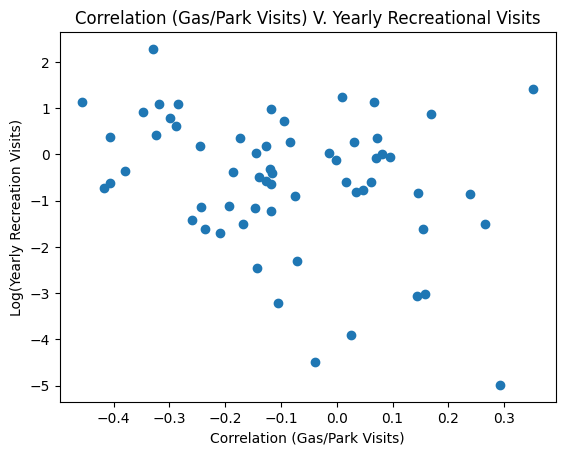

In [22]:
plt.scatter(avg_visits_by_park['Correlation'], np.log(avg_visits_by_park['Yearly_Recreation_Visits_Millions']))
plt.title("Correlation (Gas/Park Visits) V. Yearly Recreational Visits")
plt.xlabel("Correlation (Gas/Park Visits)")
plt.ylabel("Log(Yearly Recreation Visits)")
plt.show()

Using Spearman's Rank Correlation Test we can see if there is a statistically significant relationship between our correlation value from the YOY (Gas/RecreationalVisits) test and the total yearly attendance of each of the parks.

* $H_0$: No Correlation Between correlation value and total yearly attendance
* $H_a$: Correlation exists between correlation value and total yearly attendance

Using Spearman Rank Correlation Hypothesis Test. If P-Value > $\alpha$ (0.1) we can determine that the relationship of total yearly attendance is statistically significant in relation to the correlation value between YOY Gas Price Changes and YOY Park Attendance Changes.



In [23]:
# Spearman rank correlation between correlation coefficient and population
corr_spearman, p_value = spearmanr(avg_visits_by_park['Yearly_Recreation_Visits_Millions'], avg_visits_by_park['Correlation'])

print(f'Spearman Correlation: {corr_spearman}')
print(f'p-value: {p_value}')

if(p_value < 0.1):
    print("SIGNIFICANT CORRELATION")


Spearman Correlation: -0.24082496033844525
p-value: 0.06153789431020288
SIGNIFICANT CORRELATION


The Spearman Correlation Test yields a p-value of 0.062 which is less than $\alpha$ (0.1) which means there is a statistically significant relationship between our correlation values (measuring the YOY relationship between gas prices and recreational attendance to national parks) and total recreational visits by parks. The -0.24 correlation implies an inverse relationship between the two, As total attendance goes up, the correlation coefficient goes down or vice versa. Remember the correlation coefficient measures the relationship between YOY Gas Prices and YOY RecreationalVisits.

## Testing Without Grand Canyon NP

Grand Canyon NP seems like an outlier. It was the only one of our statistically significant national parks in the YOY Gas Price/ Recreational Attendance correlation test to have a positive relationship between the two. It is also one of the most visited parks, yet our original correlation test labeled it with a correlation value of 0.352, the largest of any of the national parks.

In [24]:
park_name = "'Grand Canyon NP'"

query = f'''
SELECT ParkName, Region, State, AVG(RecreationVisits) / 1000000 AS Yearly_Recreation_Visits_Millions
FROM df
WHERE ParkName != {park_name}
GROUP BY ParkName, Region, State
ORDER BY AVG(RecreationVisits) DESC
'''    
    
avg_visits_by_park = pd.read_sql_query(query, conn)

avg_visits_by_park = pd.merge(avg_visits_by_park, correlation_df, on='ParkName')

In [25]:
# Spearman rank correlation between correlation coefficient and population
corr_spearman, p_value = spearmanr(avg_visits_by_park['Yearly_Recreation_Visits_Millions'], avg_visits_by_park['Correlation'])

print(f'Spearman Correlation: {corr_spearman}')
print(f'p-value: {p_value}')

if(p_value < 0.1):
    print("SIGNIFICANT CORRELATION")

Spearman Correlation: -0.30091692136704645
p-value: 0.019475901083040398
SIGNIFICANT CORRELATION


The Spearman Correlation Test yields a p-value of 0.019 which is unsuprisingly still less than $\alpha$ (0.1). It also is less than 0.05, or the traditionally acceptable $\alpha$ value, which means there is a very large statistically significant relationship between our correlation values (measuring the YOY relationship between gas prices and recreational attendance to national parks) and total recreational visits by parks.

## Theory 2: Surrounding Populations

Out of curiosity I am going to proceed with the surrounding population analysis.

* Surrounding Population will be categorized as people with a 75 mile radius of the national park

In [26]:
npp = pd.read_csv("National_park_population.csv")
npp.to_sql('npp', conn, index=False, if_exists='replace')

60

In [27]:
npp.head()

,ParkName,Region,State,Yearly_Recreation_Visits_Millions,Correlation,Nearest_City,Surrounding_Population,Latitude,Longitude
0,Acadia NP,Northeast,ME,2.980293,-0.285002,Bar Harbor,557544,44.338974,-68.273430
1,Arches NP,Intermountain,UT,0.881669,-0.002068,Moab,171900,38.733082,-109.592514
2,Badlands NP,Midwest,SD,1.021290,-0.144446,Rapid City,216683,43.750000,-102.500000
3,Big Bend NP,Intermountain,TX,0.321691,-0.243771,Alpine,31787,29.250000,-103.250000
4,Biscayne NP,Southeast,FL,0.462570,0.047171,Homestead,6183199,25.650000,-80.080000


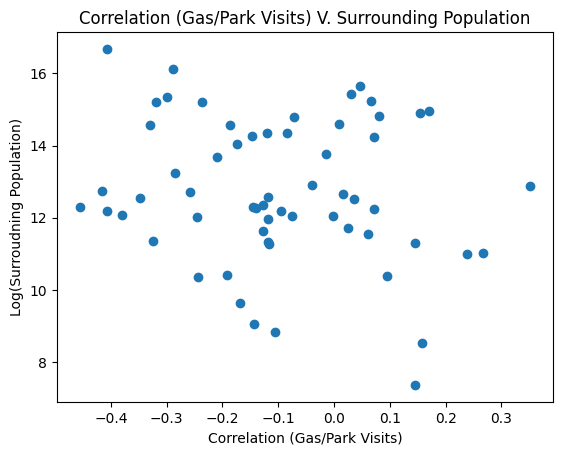

In [28]:
plt.scatter(npp['Correlation'], np.log(npp['Surrounding_Population']))
plt.title("Correlation (Gas/Park Visits) V. Surrounding Population")
plt.xlabel("Correlation (Gas/Park Visits)")
plt.ylabel("Log(Surroudning Population)")
plt.show()

Using Spearman's Rank Correlation Test we can see if there is a statistically significant relationship between our correlation value from the YOY (Gas/RecreationalVisits) test and the total surrounding population around the parks.

* $H_0$: No Correlation Between correlation value and total surrounding population
* $H_a$: Correlation exists between correlation value and total surrounding populaation

Using Spearman Rank Correlation Hypothesis Test. If P-Value > $\alpha$ (0.1) we can determine that the relationship of total surrounding population is statistically significant in relation to the correlation value between YOY Gas Price Changes and YOY Park Attendance Changes.

In [29]:
# Spearman rank correlation between correlation coefficient and population
corr_spearman, p_value = spearmanr(npp['Surrounding_Population'], npp['Correlation'])

print(f'Spearman Correlation: {corr_spearman}')
print(f'p-value: {p_value}')

if(p_value < 0.1):
    print("SIGNIFICANT CORRELATION")

Spearman Correlation: -0.13626196530858362
p-value: 0.29920989297927664


The Spearman Correlation Test yields a p-value of 0.299 which is greater than $\alpha$ (0.1). This means we fail to reject the null that there is a statistically significant relationship between our correlation values (measuring the YOY relationship between gas prices and recreational attendance to national parks) and surrounding populations by parks.

# Visualization

Our test regarding the most visited parks having the biggest inverse relationship between gas prices change percent YOY and attendance change percent YOY yielded statistically significant results. This means we can create a visual with this data to show the pattern.

In [30]:
# Scale Limits for Correlation
min_value = -.5
max_value = 0.5

# Create a folium map centered around the U.S.
m = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

colormap = linear.Reds_09.scale(min_value, max_value) 

for _, row in npp.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    value = row['Correlation'] * -1

    color = colormap(value)
    
    folium.CircleMarker(
        location=[lat, lon],
        radius= np.sqrt(row['Yearly_Recreation_Visits_Millions']) * 10,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
    ).add_to(m)

# Add color legend (color scale)
colormap.add_to(m)

title_html = '''
             <h3 align="center" style="font-size:24px;">Regular Gasoline Price Impact on Attendance of US National Parks</h3>
             <p align="center">Dot size represents total number of vistors to each national park annually. The color gradient represents the correlation between US Regular Gasoline Price Changes YOY and that national parks recreational visit changes YOY. A darker red color indicates attendance increases with lower regular gasoline prices and attendance decreases with higher regular gasoline prices. A white color indicates attendance increases with higher gasoline prices.</p>
             '''
m.get_root().html.add_child(folium.Element(title_html))

m.save("Correlation_Visits.html")

# Sources

National Park Data: https://www.responsible-datasets-in-context.com/posts/np-data/ \
Gasoline Price Data: https://www.kaggle.com/datasets/mruanova/us-gasoline-and-diesel-retail-prices-19952021 \
Population Data: https://www.statsamerica.org/radius/big.aspx \
Coordinates: https://www.geographyrealm.com/map-and-geography-trivia-u-s-national-parks/ \
Spearman: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html \
Pearson: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html \
Folium: https://python-visualization.github.io/folium/latest/


